In [1]:

import torch
def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)
!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric 

Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
     |████████████████████████████████| 3.0 MB 5.3 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
     |████████████████████████████████| 1.6 MB 5.1 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
     |████████████████████████████████| 926 kB 5.1 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
     |████████████████████████████████| 382 kB 5.0 MB/s 
     |████████████████████████████████| 222 kB 5.3 MB/s 
     |████████████████████████████████| 376 kB 28.4 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-1.7.2-py3-none-any.whl size=388143 sha256=196341ccf05ad7e1f8d99255796432644e1d212dc313bb6251922b1a7d9b82cb
  Stored in directory: /root/.cache/pip/wheels/55/93/b6/2eeb0465afe89aee74d7a07a606e9770466d7565abd45a99d5
Successfully built torch-

draw a graph that has 4 nodes, all nodes are connected to each other except node with lable 0

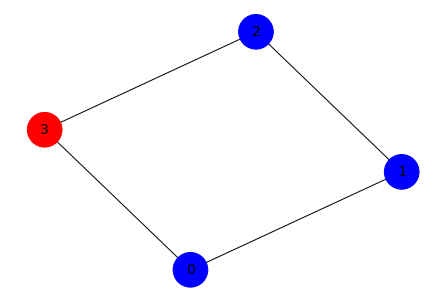

In [9]:
import torch
import torch_geometric
from torch_geometric.data  import Data 
import networkx as nx

edge_index = torch.tensor([[0, 1, 1, 2, 2,3, 0,3],
                           [1, 0, 2, 1,3,2,3,0]], dtype=torch.long)
x = torch.tensor([[4], [0], [1],[2]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)# Data

g = torch_geometric.utils.to_networkx(data, to_undirected=True)
#g.add_edge("1", "2")
color_map = []
for node in g:
    if node < 3:
        color_map.append("blue")
    else: 
        color_map.append('red')
nx.draw(g, with_labels =True,node_size=1200,font_size=14,node_color=color_map)